### EN2550 : Assignment 3 - Object Counting on a Conveyor Belt

#### Connected Component Analysis

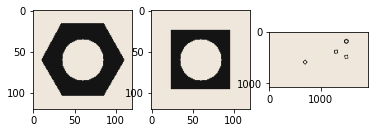

In [96]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Threshold for hexnut template: 20.0
Threshold for squarenut templete: 20.0
Threshold for conveyor f100: 20.0


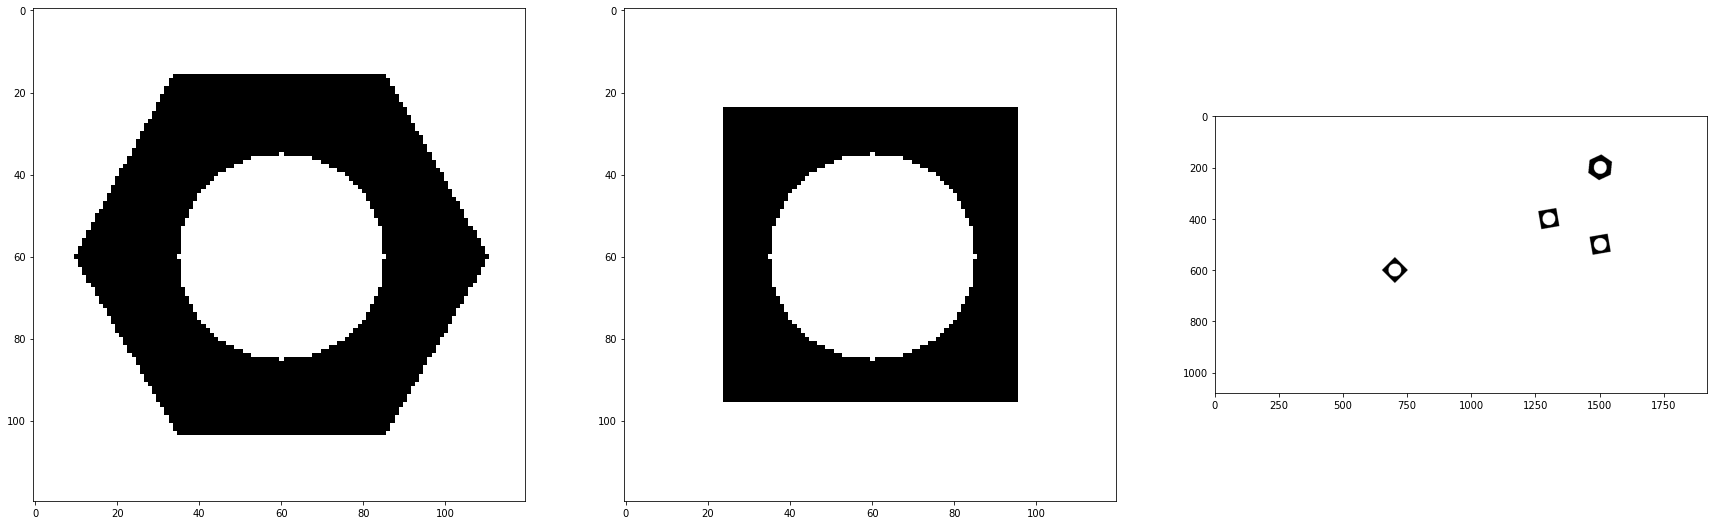

In [97]:
#convert images to gray scale
hexnut_temp_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_temp_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

#Applying Otsu's thresholding
#Hexnut Template
thres1,th_img1 = cv.threshold(hexnut_temp_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#Squarenut template
thres2,th_img2 = cv.threshold(squarenut_temp_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#Conveyor f100
thres3,th_img3 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print('Threshold for hexnut template:', thres1)
print('Threshold for squarenut templete:', thres2)
print('Threshold for conveyor f100:', thres3)

fig, ax = plt. subplots(1,3, figsize=(30,10))
ax[0].imshow(th_img1, cmap='gray')
ax[1].imshow(th_img2, cmap='gray')
ax[2].imshow(th_img3, cmap='gray')
plt.show()

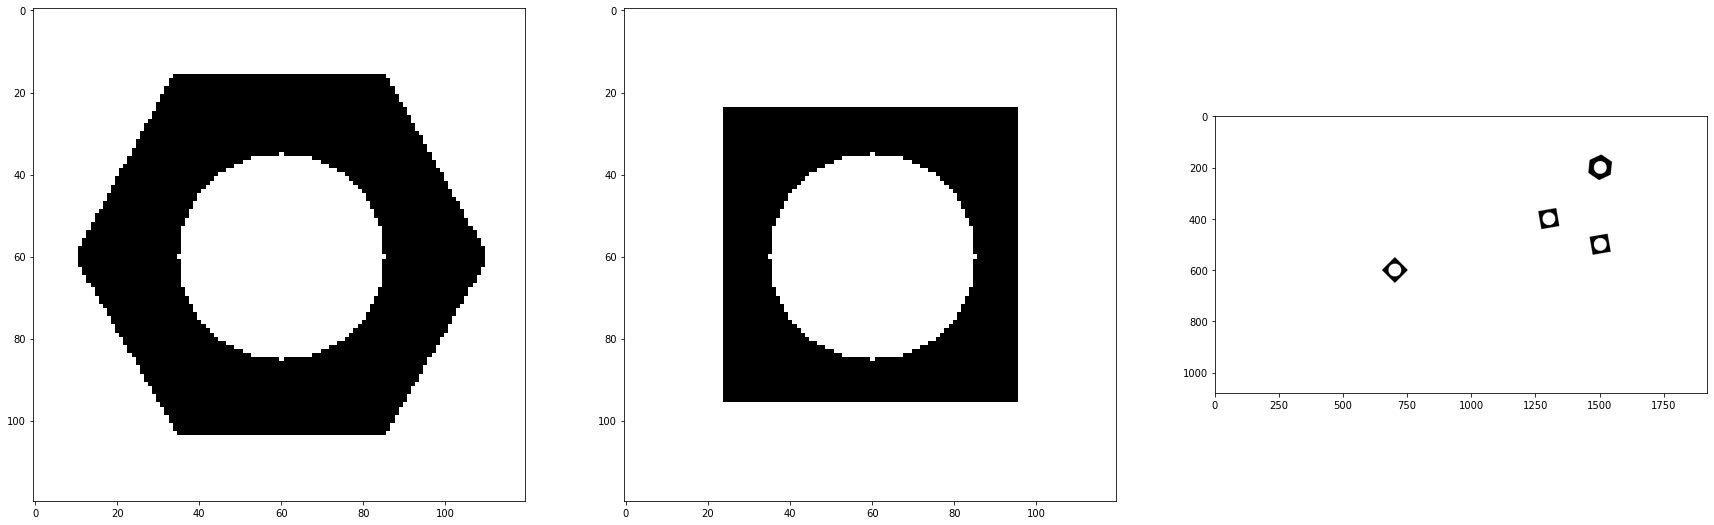

In [98]:
# Morphological Thresholding to close samll holes in foreground
kernel = np.ones((3,3),np.uint8)

hexnut_temp_1 = cv.morphologyEx(th_img1, cv.MORPH_CLOSE, kernel)
squarenut_temp_1 = cv.morphologyEx(th_img2, cv.MORPH_CLOSE, kernel)
conveyor_f100_1 = cv.morphologyEx(th_img3, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3, figsize=(30,10))
ax[0].imshow(hexnut_temp_1, cmap='gray')
ax[1].imshow(squarenut_temp_1, cmap='gray')
ax[2].imshow(conveyor_f100_1, cmap='gray')
plt.show()

Number of components detected = 3
Statistics=
 [[  11   16   99   88 4722]
 [   0    0  120  120 7717]
 [  35   35   51   51 1961]]
Centroids=
 [[59.83354511 59.22257518]
 [59.168848   59.54269794]
 [60.         60.        ]]


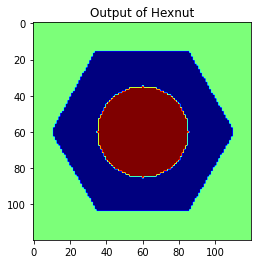

In [99]:
#Connected component analysis

#hexnut
num_components, output, stats, centroids = cv.connectedComponentsWithStats(hexnut_temp_1, connectivity=8)

plt.imshow(output, cmap='jet')
plt.title('Output of Hexnut')

print('Number of components detected =', num_components)
print('Statistics=\n', stats)
print('Centroids=\n', centroids)

Number of components detected = 3
Statistics=
 [[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]]
Centroids=
 [[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]]


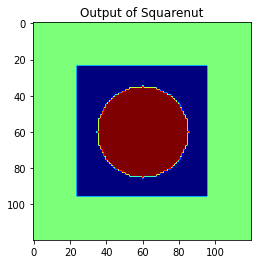

In [100]:
#squarenut
num_components_1, output_1, stats_1, centroids_1 = cv.connectedComponentsWithStats(squarenut_temp_1, connectivity=8)

plt.imshow(output_1, cmap='jet')
plt.title('Output of Squarenut')

print('Number of components detected =', num_components_1)
print('Statistics=\n', stats_1)
print('Centroids=\n', centroids_1)

The "statistics" includes these details of the detected connected component: starting x-coordinate, staring y-coordinate, components width(w), component height(h), component area (a). 

Number of components detected = 6
Statistics=
 [[    651     151     895     499   13930]
 [      0       0    1920    1080 2051826]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]]
Centroids=
 [[1275.02110553  400.11083991]
 [ 956.24734066  540.88404962]
 [1500.          200.        ]
 [1300.          400.        ]
 [1500.          500.        ]
 [ 700.          600.        ]]


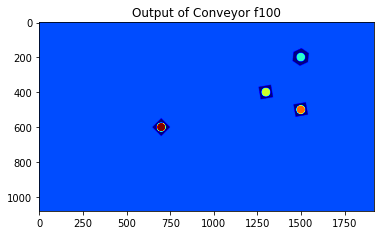

In [101]:
#conveyor f100
num_components_2, output_2, stats_2, centroids_2 = cv.connectedComponentsWithStats(conveyor_f100_1, connectivity=8)


plt.imshow(output_2, cmap='jet')
plt.title('Output of Conveyor f100')

print('Number of components detected =', num_components_2)
print('Statistics=\n', stats_2)
print('Centroids=\n', centroids_2)

##### Contour Analysis

In [102]:
background = np.zeros((1080, 1920, 3)).astype(np.uint8)
#background = cv.cvtColor(background, cv.COLOR_BGR2RGB)

5198.0
5183.0
5183.0
6726.0


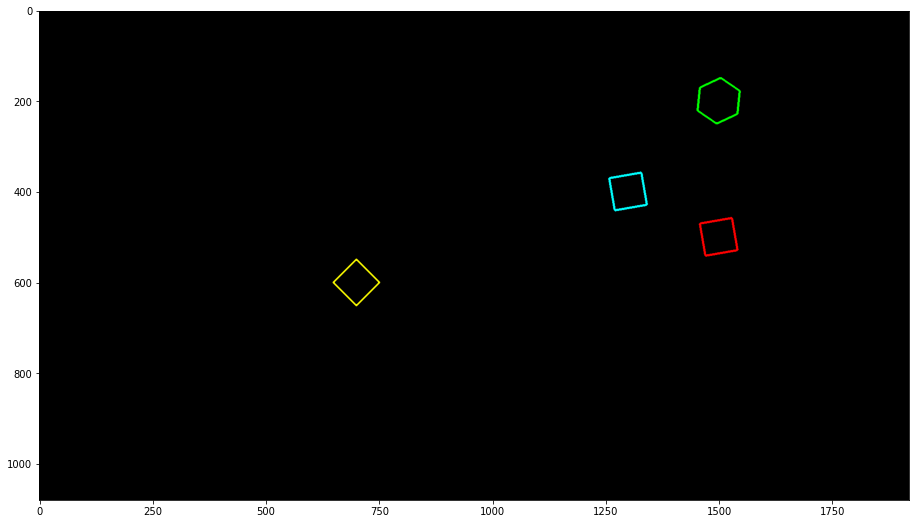

In [103]:
#contour analysis
contours, hierarchy = cv.findContours(conveyor_f100_1, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

color_arr = [(0, 255, 255), (0, 0, 255), (255, 255, 0), (0, 255, 0)]
col_count = 0

for i in range(len(contours)):
    cnt = contours[i]
    area = cv.contourArea(cnt)  #obtain contour area
    
    if 4000 < area < 8000:  
        #selecting outermost contours of hex & square nut by area
        cv.drawContours(background, [cnt], 0, color_arr[col_count], 3)
        print(area)
        col_count += 1

background = cv.cvtColor(background, cv.COLOR_BGR2RGB)
plt.figure(figsize=(16, 9))
plt.imshow(background)

### Detecting Objects on a Synthetic Conveyor

### 1

In [104]:
black = np.zeros((1080, 1920, 3)).astype(np.uint8)


Number of Hexnuts detected in conveyor_f100 = 1


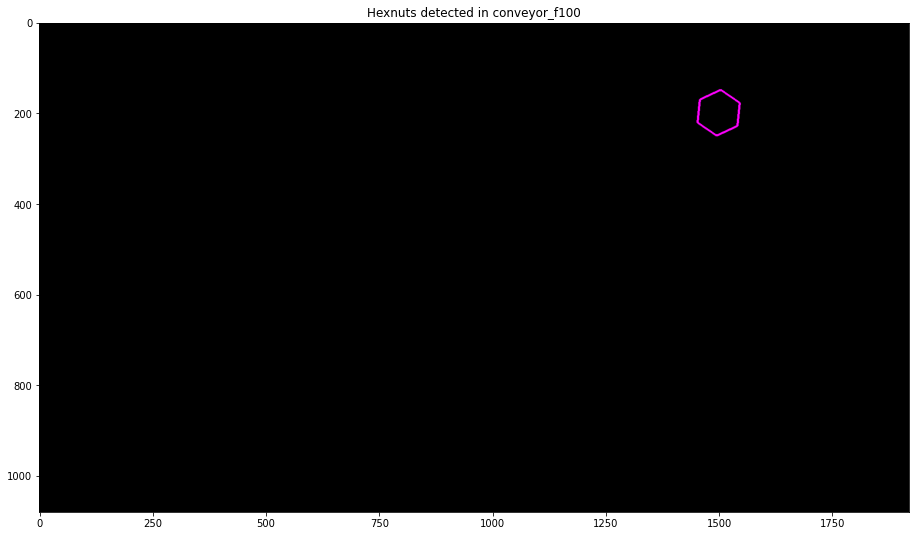

In [105]:
#counting the number of Hexnuts on conveyor belt
hexnut_count = 0

#get the outermost contour of hexnut template
contours1, hierarchy1 = cv.findContours(hexnut_temp_1, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cnt_hex = contours1[1]

#get the contours of conveyor_f100.jpg
contours2, hierarchy2 = cv.findContours(conveyor_f100_1, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for j in range(len(contours2)):
    cnt_f = contours2[j]
    
    #matching the contours
    s = cv.matchShapes(cnt_hex, cnt_f, 1, 0.0)  #s = similarity

    if s < 1e-5:
        hexnut_count += 1
        cv.drawContours(black, [cnt_f], 0, (255, 0, 255), 3)  #draw detected contour
        
black = cv.cvtColor(black, cv.COLOR_BGR2RGB)
plt.figure(figsize=(16, 9))
plt.title('Hexnuts detected in conveyor_f100')
plt.imshow(black)

print('Number of Hexnuts detected in conveyor_f100 =', hexnut_count)

### 2
Display the object count in current frame

Display total count upto current frame

In [108]:
hex_count = 0
sq_count = 0
hex_prev = 0
sq_prev = 0
tot_hex_count = 0
tot_sq_count = 0

#Hexnut outer contour
contours_h, hierarchy_h = cv.findContours(hexnut_temp_1, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cnt_hex = contours_h[1]

#Squarenut outer contour
contours_s, hierarchy_s = cv.findContours(squarenut_temp_1, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cnt_sq = contours_s[1]

frame_array = []
shape = (1080, 1920, 3)

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []    

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    #convert the frame to binary
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(frame_gray, 50, 255, 0)

    #get the contours on the frame
    contours_f, hierarchy_f = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

    #counting the hexnuts
    for k in range(len(contours_f)):
        cnt_f = contours_f[k]
        area_cnt = cv.contourArea(cnt_f)  #obtain contour area

        #matching the contours for hexnuts
        s_hex = cv.matchShapes(cnt_hex, cnt_f, 1, 0.0)  #similarity for hexnut
        if (s_hex < 0.001) and (6500<area_cnt<6900):
            hex_count += 1

        #matching the contours for square nuts
        s_sq = cv.matchShapes(cnt_sq, cnt_f, 1, 0.0)  #similarity for sqaurenut
        if (s_sq < 0.001) and (5000<area_cnt<5400):
            sq_count += 1

    #counting total hexnuts and squarenuts upto the current frame
    if hex_prev <= hex_count:
        diff = hex_count - hex_prev
        tot_hex_count += diff
        hex_prev = hex_count
    elif hex_count < hex_prev:
        hex_prev = hex_count

    if sq_prev <= sq_count:
        diff1 = sq_count - sq_prev
        tot_sq_count += diff1
        sq_prev = sq_count
    elif sq_count < sq_prev:
        sq_prev = sq_count
        
    f += 1
    text = 'Frame: ' + str(f)
    text_hex_frame = 'Hexnuts/frame: ' + str(hex_count)
    text_sq_frame = 'Squarenuts/frame: ' + str(sq_count)
    text_tot_frame = 'Objects/frame: ' + str(sq_count + hex_count)
    text_total_hex = 'Total Hexnuts: ' + str(tot_hex_count)
    text_total_sq = 'Total Sqaurenuts: ' + str(tot_sq_count)
    text_total = 'Total No. Objects: ' + str(tot_hex_count + tot_sq_count)

    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text_hex_frame , (100, 200), cv.FONT_HERSHEY_COMPLEX, 1, (255,0, 0), 1, cv.LINE_AA)
    cv.putText(frame,text_sq_frame , (100, 300), cv.FONT_HERSHEY_COMPLEX, 1, (255,0, 0), 1, cv.LINE_AA)
    cv.putText(frame,text_tot_frame , (100, 400), cv.FONT_HERSHEY_COMPLEX, 1, (255,0, 0), 1, cv.LINE_AA)
    cv.putText(frame,text_total_hex , (700, 200), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,255), 1, cv.LINE_AA)
    cv.putText(frame,text_total_sq , (700, 300), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,255), 1, cv.LINE_AA)
    cv.putText(frame,text_total , (700, 400), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,255), 1, cv.LINE_AA)

    frame_array.append(frame)

    cv.imshow('Conveyor', frame)
    hex_count = 0
    sq_count = 0

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [107]:
out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()